In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [18]:
df = pd.read_csv('HA_cleaned.csv')

cat_col = ['income_level','smoking_status','physical_activity','air_pollution_exposure','stress_level']
bin_col = ['gender','region','diabetes','obesity','family_history','alcohol_consumption','dietary_habits','EKG_results','previous_heart_disease','medication_usage','participated_in_free_screening']
con_col = ['age','waist_circumference','sleep_hours','blood_pressure_systolic','blood_pressure_diastolic','fasting_blood_sugar','cholesterol_level','cholesterol_nonhdl','cholesterol_ldl','triglycerides']
result_col = ['heart_attack']

In [ ]:
category_dict = {
    "gender": {
        0: "female",
        1: "male"
    },
    "region": {
        0: "rural",
        1: "urban"
    },
    "income_level": {
        0: "low",
        1: "middle",
        2: "high"
    },
    "smoking_status": {
        0: "never",
        1: "past",
        2: "current"
    },
    "alcohol_consumption": {
        0: "moderate",
        1: "high"
    },
    "physical_activity": {
        0: "low",
        1: "moderate",
        2: "high"},
    "dietary_habits": {
        0: "unhealthy",
        1: "healthy"
    },
    "air_pollution_exposure": {
        0: "low",
        1: "moderate",
        2: "high"
    },
    "EKG_results": {
        0: "abnormal",
        1: "normal"
    },
    # The following variables have not undergone encoding
    "diabetes":{
        0: "no",
        1: "yes"
    },
    "obesity":{
        0: "no",
        1: "yes"
    },
    "family_history":{
        0: "no",
        1: "yes"
    },
    "previous_heart_disease": {
        0: "no",
        1: "yes"
    },
    "medication_usage": {
        0: "no",
        1: "yes"
    },
    "participated_in_free_screening": {
        0: "no",
        1: "yes"
    }
}

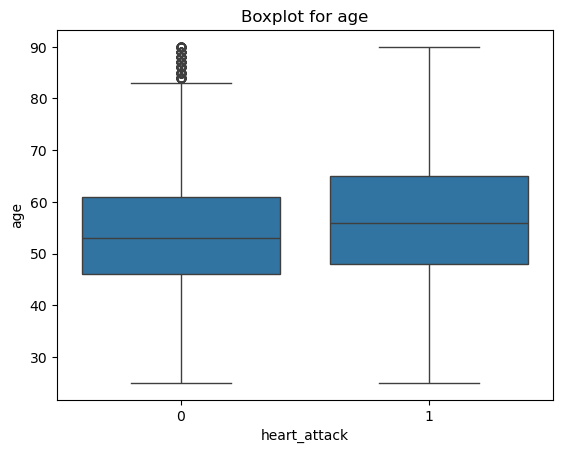

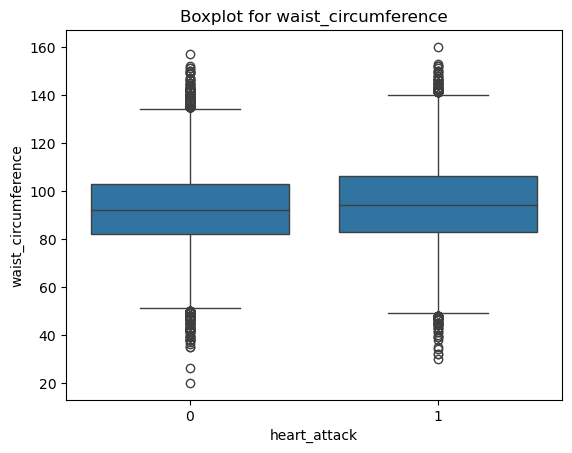

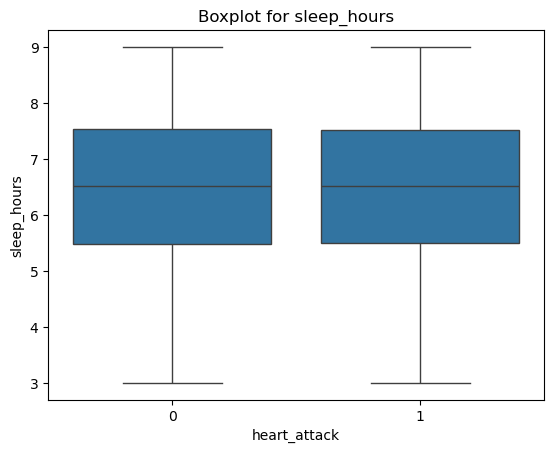

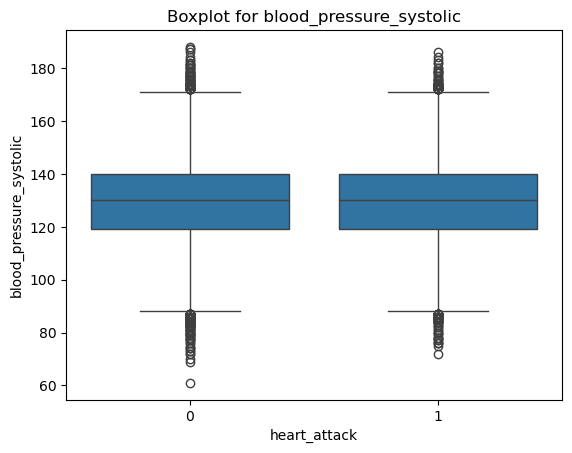

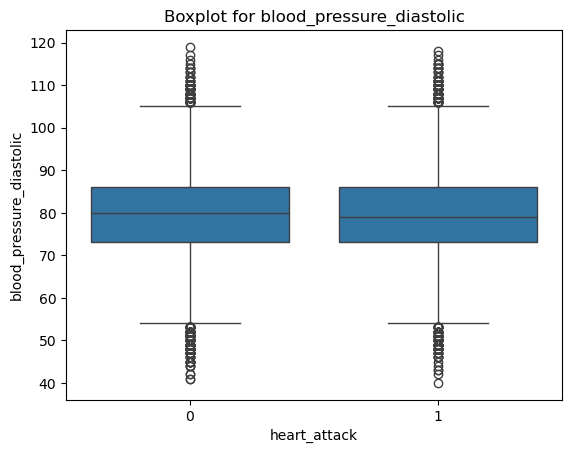

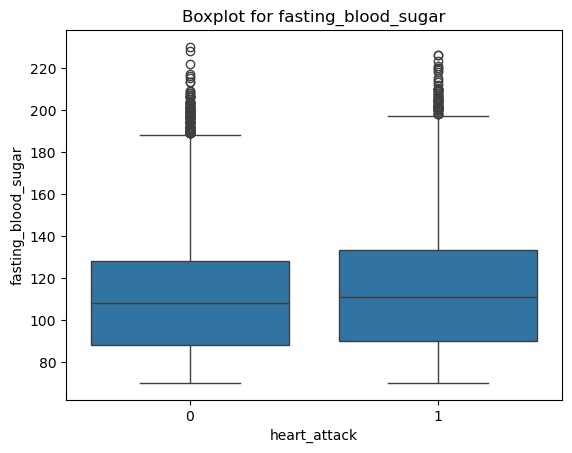

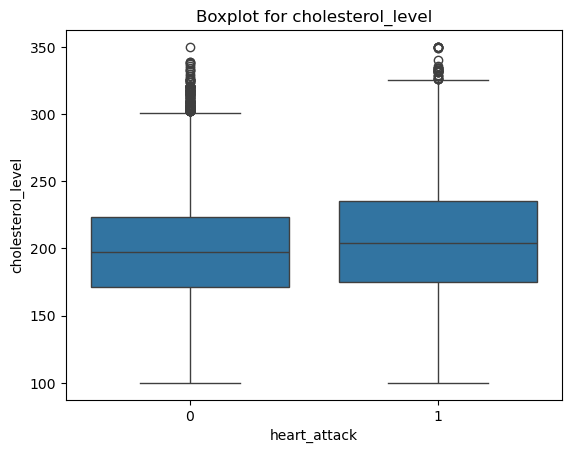

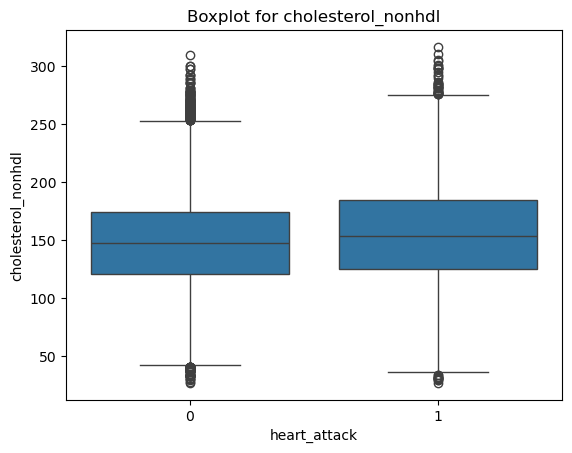

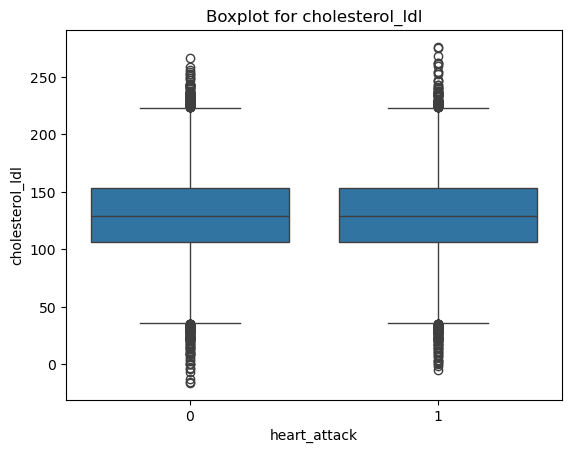

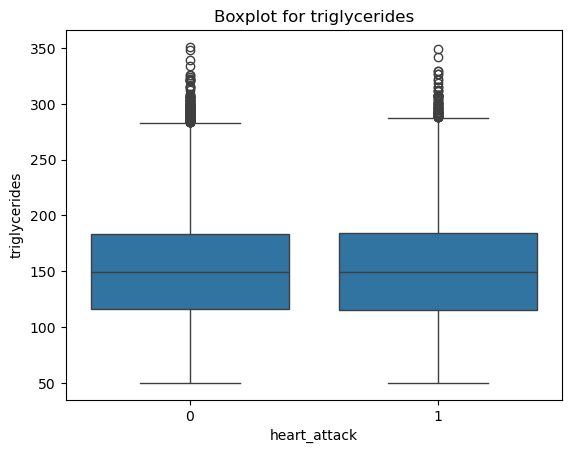

In [20]:
for column in con_col:
    plt.figure()
    sns.boxplot(x='heart_attack', y=column, data=df)
    plt.title(f'Boxplot for {column}')
    plt.show()

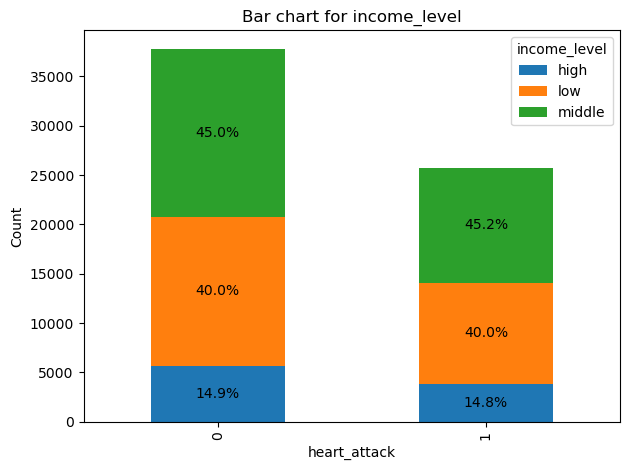

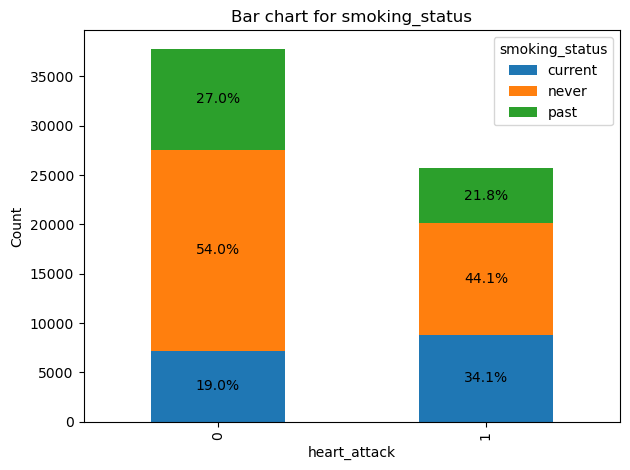

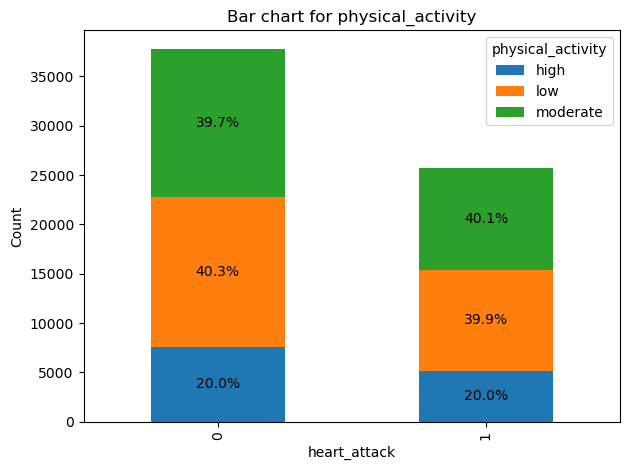

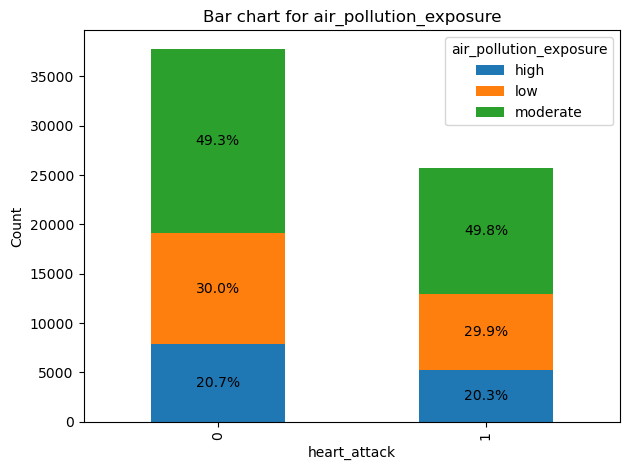

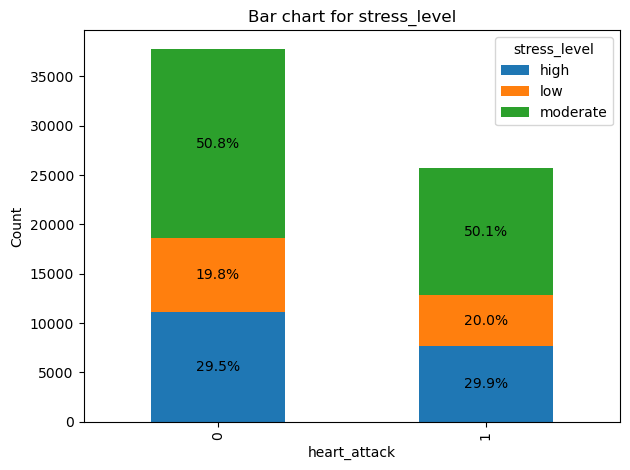

In [21]:
df_without_replace = pd.read_csv("./HA_cleaned_without_replacing.csv")
for column in cat_col:
    counts = df_without_replace.groupby('heart_attack')[column].value_counts().unstack()
    ax = counts.plot(kind='bar', stacked=True)
    
    # Calculate y_positions for each bar segment
    y_positions = np.zeros(len(counts))
    
    # Add percentage labels
    for i in range(len(counts.columns)):
        heights = counts.iloc[:, i]
        percentages = (heights / counts.sum(axis=1) * 100)  # Calculate percentage relative to each group
        y_positions_current = y_positions + heights/2
        
        for j, (x, y, p) in enumerate(zip(range(len(heights)), y_positions_current, percentages)):
            ax.text(x, y, f'{p:.1f}%',
                   horizontalalignment='center',
                   verticalalignment='center')
        
        y_positions += heights
    
    plt.title(f'Bar chart for {column}')
    plt.xlabel('heart_attack')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.tight_layout()
    plt.show()

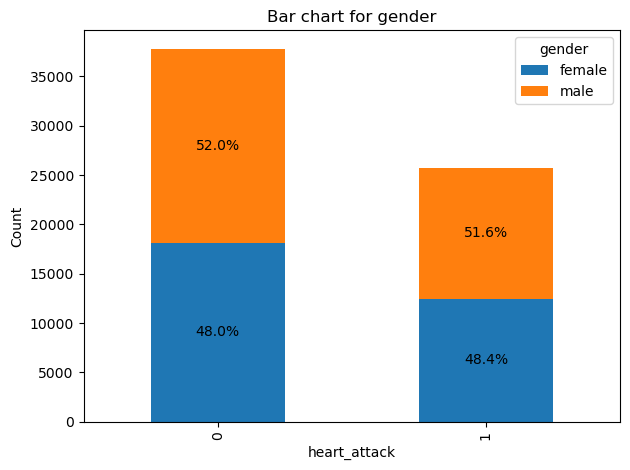

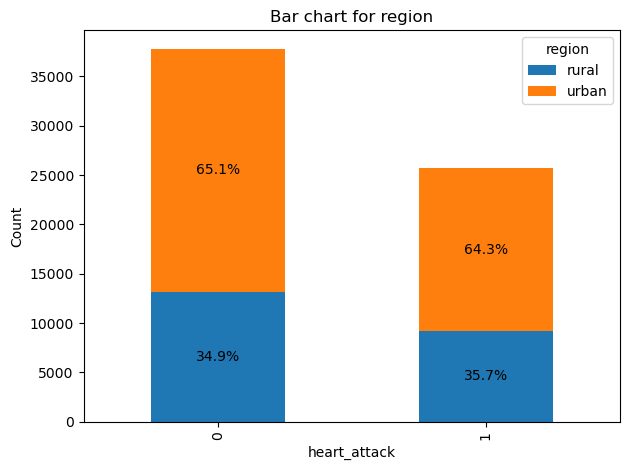

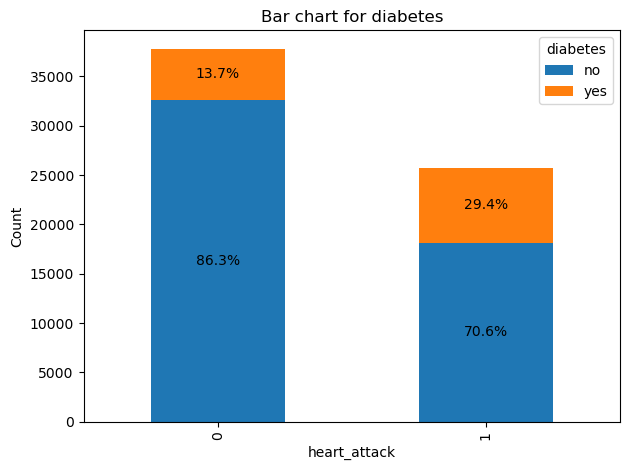

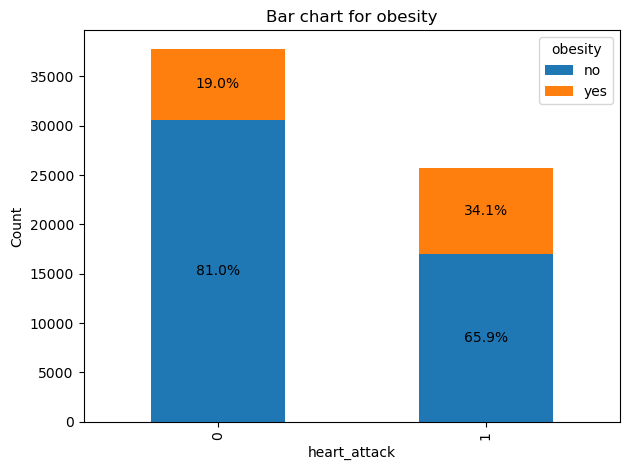

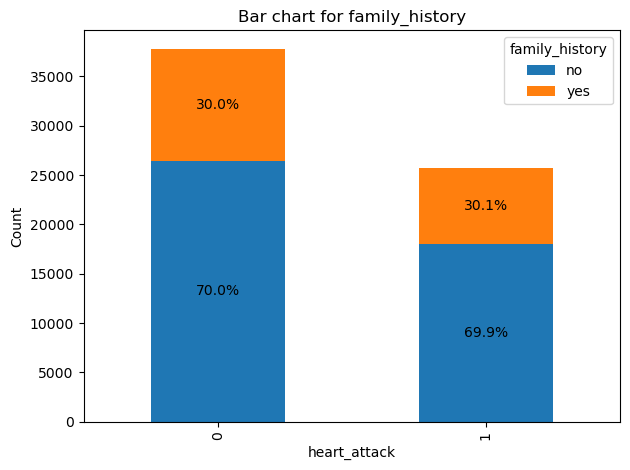

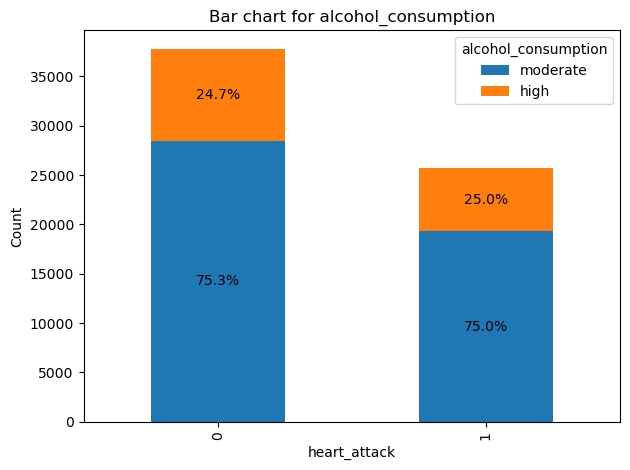

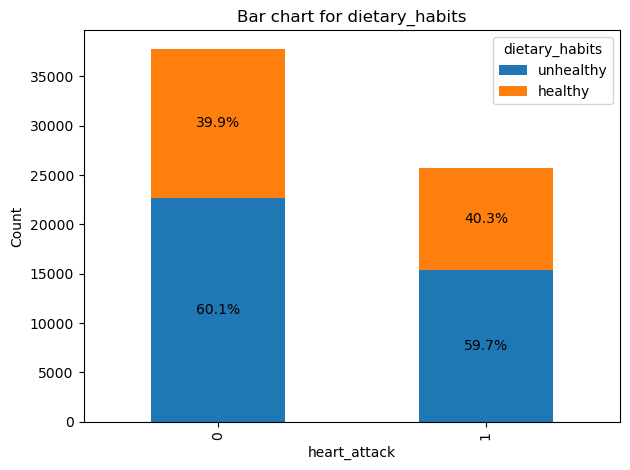

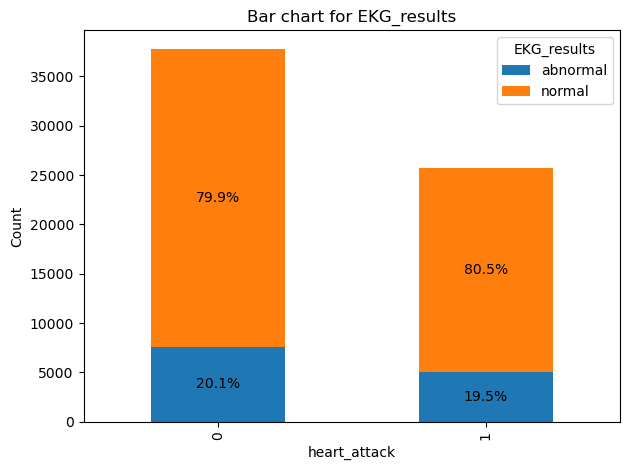

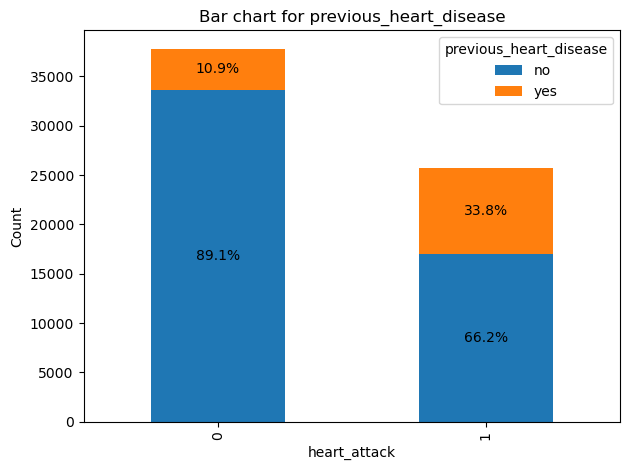

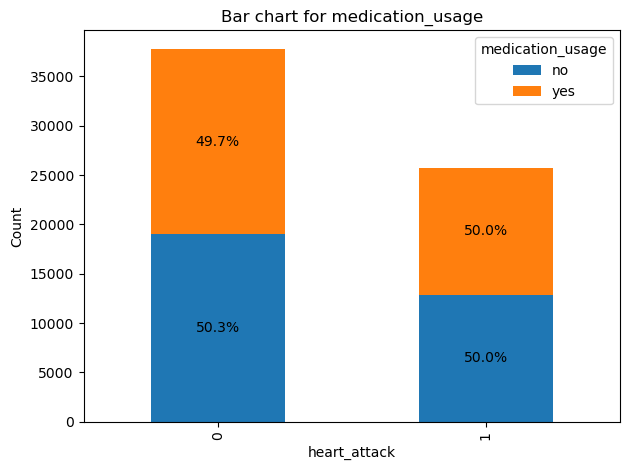

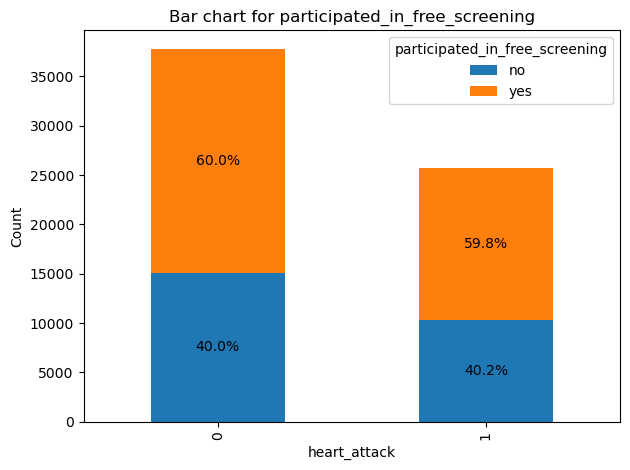

In [22]:
for column in bin_col:
    counts = df.groupby('heart_attack')[column].value_counts().unstack()
    
    # Map the column values using category_dict
    if column in category_dict:
        counts.columns = counts.columns.map(category_dict[column])
    
    ax = counts.plot(kind='bar', stacked=True)
    
    # Calculate y_positions for each bar segment
    y_positions = np.zeros(len(counts))
    
    # Add percentage labels
    for i in range(len(counts.columns)):
        heights = counts.iloc[:, i]
        percentages = (heights / counts.sum(axis=1) * 100)
        y_positions_current = y_positions + heights/2
        
        for j, (x, y, p) in enumerate(zip(range(len(heights)), y_positions_current, percentages)):
            ax.text(x, y, f'{p:.1f}%',
                   horizontalalignment='center',
                   verticalalignment='center')
        
        y_positions += heights
    
    plt.title(f'Bar chart for {column}')
    plt.xlabel('heart_attack')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.tight_layout()
    plt.show()